사진 바꿔서 인퍼런스 2개 이상 내서 제출

In [1]:
!pip install efficientnet_pytorch

import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from efficientnet_pytorch import EfficientNet
from PIL import Image
import json
import requests
from google.colab import drive

# Google Drive 마운트
drive.mount('/content/drive')

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 94.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 50.8 MB/s eta 0:00:00
  Created wheel for efficientnet_pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16424 sha256=27df48a24e71f9c36bd36ae1d8a195431a77b9ab0a40638ef

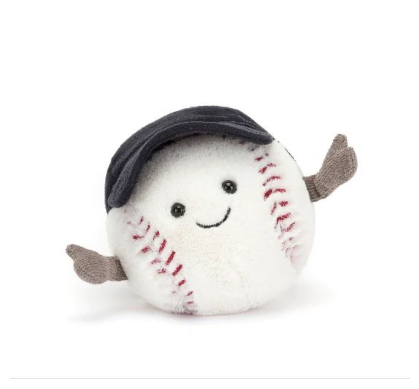

In [3]:
image_path = "/content/drive/MyDrive/Colab Notebooks/BOAZ/efficientnet_발제/imgs/"
image = Image.open(image_path+"01.jpg")
plt.imshow(image)
plt.axis("off")  # 축 제거
plt.show()

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth
100%|██████████| 20.4M/20.4M [00:00<00:00, 330MB/s]


Loaded pretrained weights for efficientnet-b0
baseball: 64.40%
golf_ball: 3.16%
tennis_ball: 2.68%
ping-pong_ball: 1.45%
maraca: 0.50%


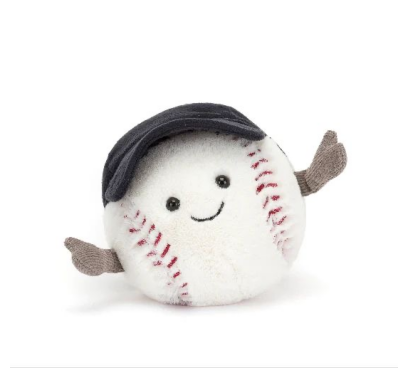

In [9]:
#ImageNet 클래스 매핑
imagenet_json_path = "/content/drive/MyDrive/Colab Notebooks/BOAZ/efficientnet_발제/imagenet.json"

with open(imagenet_json_path, "r") as f:
    imagenet_classes = json.load(f)

#모델 로드
model = EfficientNet.from_pretrained('efficientnet-b0')
model.eval()


def preprocess_image(image_path, image_size):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  #사이즈 맞게 정리
    ])

    image = Image.open(image_path).convert('RGB')  #PIL 이미지로 변환
    image = transform(image)
    image = image.unsqueeze(0)  #배치 차원 수정

    return image

#추론 함수
def inference(model, image_path):
    image_size = model._conv_stem.weight.shape[2]
    input_tensor = preprocess_image(image_path, image_size)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    input_tensor = input_tensor.to(device)

    # 추론 수행
    with torch.no_grad():
        output = model(input_tensor)

    # 결과 해석
    probabilities = torch.nn.functional.softmax(output[0], dim=0)  # 소프트맥스 적용
    top5_prob, top5_catid = torch.topk(probabilities, 5)  # 상위 5개 클래스 추출

    for i in range(5):
        class_idx = str(top5_catid[i].item())
        class_name = imagenet_classes[class_idx][1]
        print(f"{class_name}: {top5_prob[i].item() * 100:.2f}%")

    # 원본 이미지 출력
    image = Image.open(image_path)
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# 실행
inference(model, image_path+"01.jpg")


kuvasz: 25.14%
clumber: 19.67%
golden_retriever: 12.34%
Great_Pyrenees: 8.44%
Labrador_retriever: 2.82%


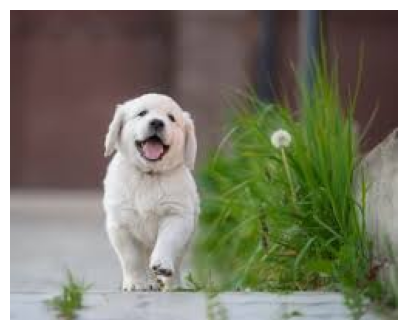

In [10]:
inference(model, image_path+"02.jpg")

In [11]:
model = EfficientNet.from_pretrained('efficientnet-b7')
model.eval()

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b7-dcc49843.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b7-dcc49843.pth
100%|██████████| 254M/254M [00:01<00:00, 207MB/s]


Loaded pretrained weights for efficientnet-b7


EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 64, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d((0, 1, 0, 1))
  )
  (_bn0): BatchNorm2d(64, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        64, 64, kernel_size=(3, 3), stride=[1, 1], groups=64, bias=False
        (static_padding): ZeroPad2d((1, 1, 1, 1))
      )
      (_bn1): BatchNorm2d(64, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        64, 16, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        16, 64, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False
  

baseball: 90.34%
ballplayer: 0.44%
wool: 0.39%
ping-pong_ball: 0.37%
saltshaker: 0.21%


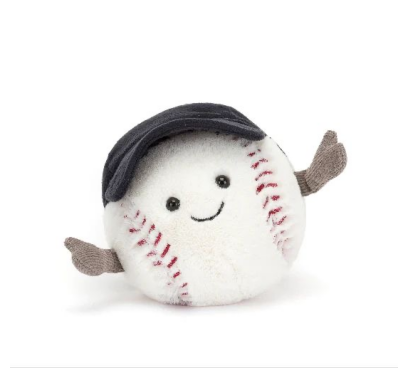

In [12]:
inference(model, image_path+"01.jpg")

golden_retriever: 46.52%
Labrador_retriever: 29.10%
kuvasz: 2.86%
clumber: 1.69%
Great_Pyrenees: 1.31%


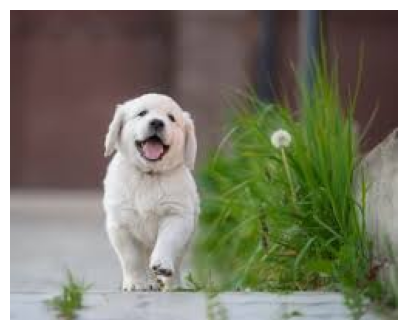

In [13]:
inference(model, image_path+"02.jpg")